In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("vgsales_dirty.csv")
print(data.head(5))


   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


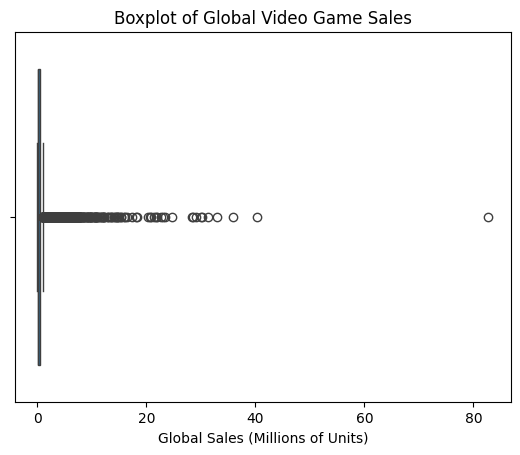

In [68]:
sns.boxplot(x=data["Global_Sales"])

plt.title("Boxplot of Global Video Game Sales")
plt.xlabel("Global Sales (Millions of Units)")

plt.show()

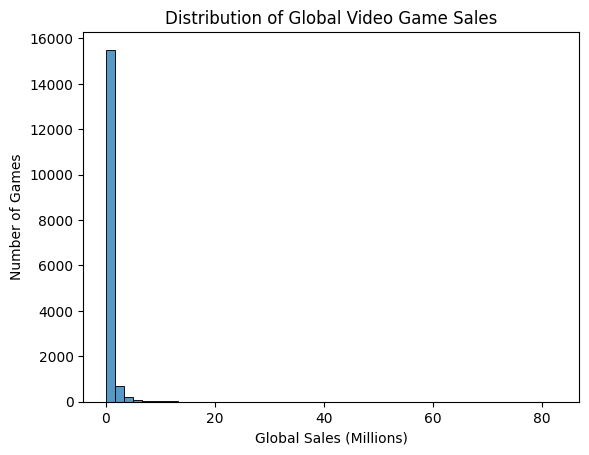

In [69]:
sns.histplot(data["Global_Sales"], bins=50)

plt.title("Distribution of Global Video Game Sales")
plt.xlabel("Global Sales (Millions)")
plt.ylabel("Number of Games")

plt.show()



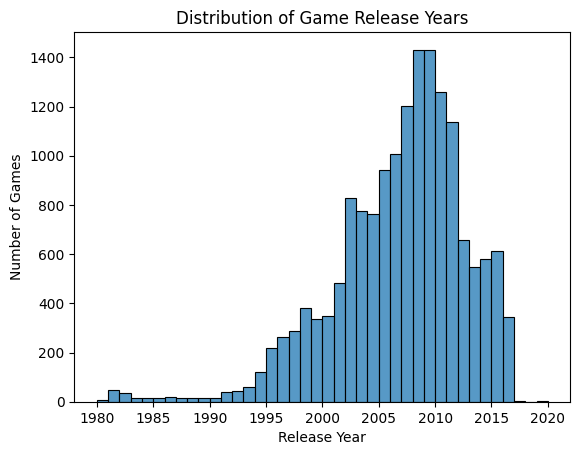

In [70]:
sns.histplot(data["Year"], bins=40)

plt.title("Distribution of Game Release Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Games")

plt.show()

In [71]:
print(data.info())
print(data.describe())
print(data.shape)
print(data.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None
               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.8

In [72]:
data.columns = (
    data.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

data.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [73]:
data["publisher"] = data["publisher"].replace("nan", "Unknown")
data["publisher"] = data["publisher"].fillna("Unknown")
print(data["publisher"].isna().sum())


0


In [74]:
data = data.dropna(subset=["year"])
print("After dropping missing years:", data.shape)


After dropping missing years: (16327, 11)


In [75]:
data.duplicated().sum()
data = data.drop_duplicates()

In [ ]:
sales_cols = ["na_sales","eu_sales","jp_sales","other_sales","global_sales"]
for col in sales_cols:
    data[col] = pd.to_numeric(data[col], errors="coerce")


In [79]:
data.to_csv("vgsales_cleaned.csv", index=False)

print("File saved as vgsales_cleaned.csv")


File saved as vgsales_cleaned.csv
